In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Advertising.csv')

In [3]:
X = df.drop('sales', axis = 1)

In [4]:
y = df['sales']

In [5]:
from sklearn.preprocessing import PolynomialFeatures

In [6]:
ploynomial_converter = PolynomialFeatures(degree = 2, include_bias = False)

In [62]:
ploynomial_converter.fit(X)

PolynomialFeatures(include_bias=False)

In [8]:
poly_features = ploynomial_converter.transform(X)

In [9]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split( poly_features, y, test_size=0.33, random_state=101)

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
model = LinearRegression()

In [14]:
model.fit(X_train, y_train)

LinearRegression()

In [15]:
test_predictions = model.predict(X_test)

In [16]:
model.coef_

array([ 5.25319441e-02,  1.42773271e-02,  1.47528851e-02, -1.12739168e-04,
        1.13231490e-03, -5.42180033e-05,  6.26813126e-05,  8.93347558e-05,
       -3.52004070e-05])

In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [18]:
MAE = mean_absolute_error(y_test, test_predictions)

In [19]:
MSE = mean_squared_error(y_test, test_predictions)

In [20]:
RMSE = np.sqrt(MSE)

In [21]:
MAE

0.4842810535215693

In [22]:
RMSE

0.6482912032533732

In [23]:
# Создать полином нужного порядка
# Разбить данные на обучающий и тестовый наборы данныз
# Обучить модель 
# Сохранить RMSE для тестовых и обучаюших набор данных
# Нарисовать график с результатами - ошибка по степеням полинома


In [33]:
train_rmse_errors = []
test_rmse_errors = []

for d in range(1,10):
    poly_converter = PolynomialFeatures(degree = d, include_bias = False)
    poly_features = poly_converter.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split( poly_features, y, test_size=0.33, random_state=101)
    
    model = LinearRegression()
    model.fit(X_train,  y_train)

    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))
    
    train_rmse_errors.append(train_rmse)
    test_rmse_errors.append(test_rmse)

In [34]:
train_rmse_errors

[1.7376515982447711,
 0.5947926597019143,
 0.44059734232363645,
 0.35329132820381115,
 0.24845372187804055,
 0.1884732078373214,
 3.0234385572877165,
 0.1535865126811578,
 0.15221287882636245]

In [35]:
test_rmse_errors

[1.5324409426512413,
 0.6482912032533732,
 0.5577254823386943,
 0.5064297296418724,
 2.357361677352952,
 11.260675747143917,
 583.7402287171903,
 3499.535390758152,
 145461.66139531342]

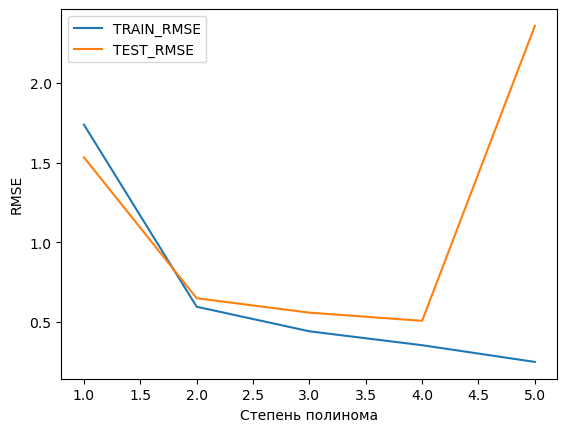

In [40]:
plt.plot(range(1,6), train_rmse_errors[:5], label = 'TRAIN_RMSE')
plt.plot(range(1,6), test_rmse_errors[:5], label = 'TEST_RMSE')
plt.xlabel('Степень полинома')
plt.ylabel('RMSE')
plt.legend()

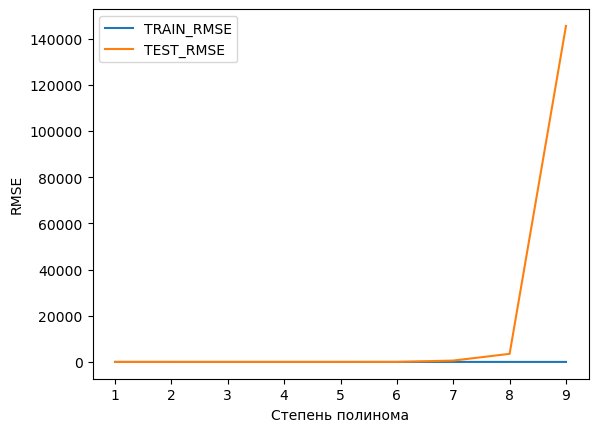

In [41]:
plt.plot(range(1,10), train_rmse_errors, label = 'TRAIN_RMSE')
plt.plot(range(1,10), test_rmse_errors, label = 'TEST_RMSE')
plt.xlabel('Степень полинома')
plt.ylabel('RMSE')
plt.legend()

In [42]:
final_poly_converter = PolynomialFeatures(degree = 3, include_bias = False)

In [43]:
final_model = LinearRegression()

In [46]:
full_converted_X = final_poly_converter.fit_transform(X)

final_model.fit(full_converted_X, y)

LinearRegression()

In [47]:
from joblib import dump, load

In [48]:
dump(final_model, 'final_poly_model.joblib')

['final_poly_model.joblib']

In [51]:
dump(final_poly_converter, 'final_poly_converter.joblib')

['final_poly_converter.joblib']

In [52]:
loaded_converter = load('final_poly_converter.joblib')

In [53]:
loaded_model = load('final_poly_model.joblib')

In [54]:
campaign = [[149, 22,12]]

In [57]:
loaded_converter.fit_transform(campaign)

array([[1.490000e+02, 2.200000e+01, 1.200000e+01, 2.220100e+04,
        3.278000e+03, 1.788000e+03, 4.840000e+02, 2.640000e+02,
        1.440000e+02, 3.307949e+06, 4.884220e+05, 2.664120e+05,
        7.211600e+04, 3.933600e+04, 2.145600e+04, 1.064800e+04,
        5.808000e+03, 3.168000e+03, 1.728000e+03]])

In [58]:
transformed_data = loaded_converter.fit_transform(campaign)

In [60]:
loaded_model.predict(transformed_data)

array([14.64501014])